### Importing the Required Libraries & Dataset

In [127]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
data=pd.read_csv("Udemy-Courses.csv",parse_dates=["published_timestamp"])

### Display the Top 3 Rows of the Dataset

In [129]:
data.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance


### Displaying the Last 3 Rows of the Dataset

In [130]:
data.tail(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28 19:51:11+00:00,Web Development


### Finding the Shape of the Dataset[No. of the Rows & Columns]

In [131]:
print("The No. of the Rows:",data.shape[0])
print("The No. of the Columns:",data.shape[1])

The No. of the Rows: 3678
The No. of the Columns: 12


### Getting the Info of the Dataset

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

### Getting the Overall Statistics of the Dataset

In [133]:
data.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


### Checking the Null Values of the Dataset

In [134]:
data.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

<Axes: >

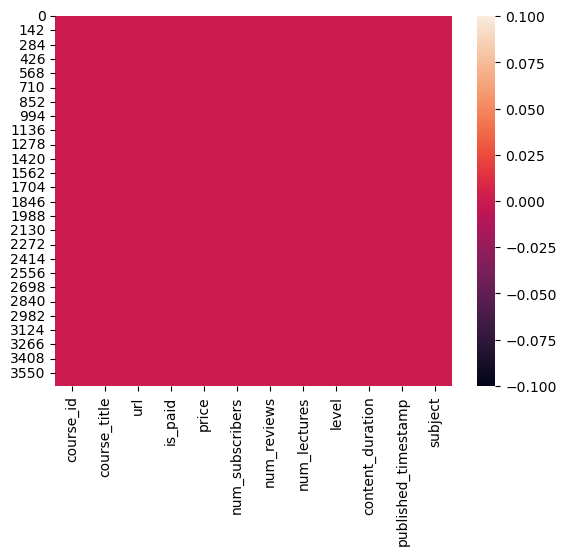

In [135]:
sns.heatmap(data.isnull())

### Checking for the Dupicates & Drop Duplicates

In [136]:
duplicates=data.duplicated().any()
print("Are there any duplicates:",duplicates)

Are there any duplicates: True


In [137]:
data.drop_duplicates(inplace=True)

### Find Out the No. of the Courses Per Subject

In [138]:
data["subject"].value_counts()

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

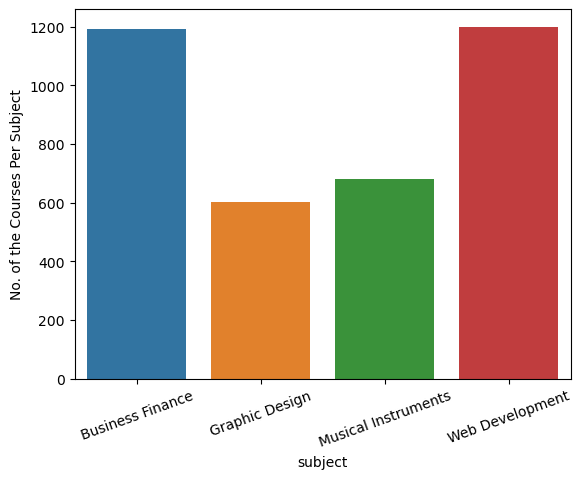

In [139]:
sns.countplot(x="subject",data=data)
plt.ylabel("No. of the Courses Per Subject")
plt.xticks(rotation=20)
plt.show()

### Find Out the Levels of the Udemy Courses

In [140]:
data["level"].value_counts()

level
All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

<Axes: xlabel='level', ylabel='count'>

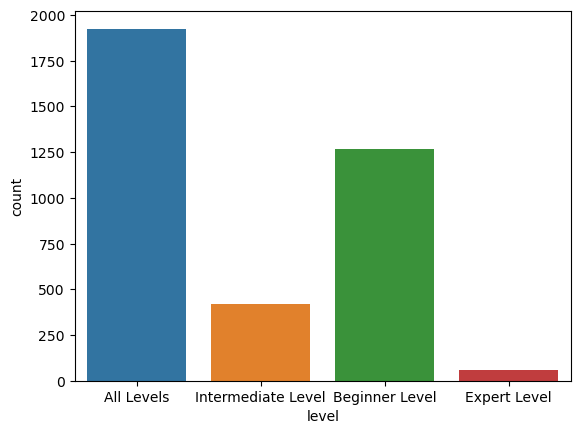

In [141]:
sns.countplot(x="level",data=data)

### How many Courses Aare Free & how many are Paid Courses 

In [142]:
data["is_paid"].value_counts()

is_paid
True     3362
False     310
Name: count, dtype: int64

<Axes: xlabel='is_paid', ylabel='count'>

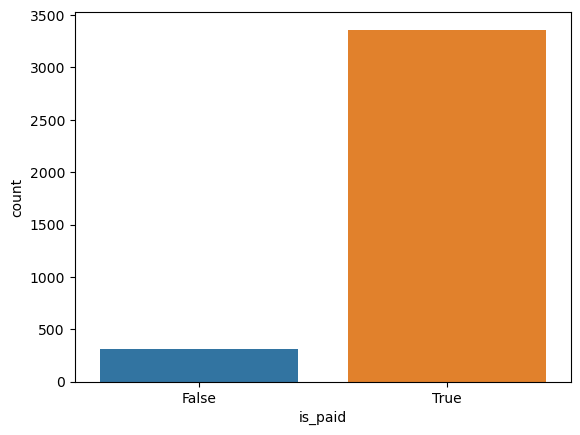

In [143]:
sns.countplot(x="is_paid",data=data)

### Which Course has maximum Lectures?

In [144]:
data.groupby("course_title")["num_lectures"].max()

course_title
#1 Piano Hand Coordination: Play 10th Ballad in Eb Key songs    68
#10 Hand Coordination - Transfer Chord Ballad 9 - C & Bb Key    41
#12 Hand Coordination: Let your Hands dance with Ballad 9       47
#4 Piano Hand Coordination: Fun Piano Runs in 2 Beats C Key     43
#5  Piano Hand Coordination:  Piano Runs in 2 Beats Eb Key      32
                                                                ..
财务分析与估值建模入门                                                     10
超基礎！超入門！〜作りながら学ぶ。完全無料3DCGソフトBlender〜                            43
캔바(Canva)로 SNS 콘텐츠 만들기                                          19
６時間でインターバンク市場を攻略！最短距離でトレード基礎力                                   54
７日でマスター  ビギナー向け Adobe Illustrator　どきどきセミナー                      44
Name: num_lectures, Length: 3663, dtype: int64

### Which Course has the Highest No. of the Subscribers[Free or Paid]

In [145]:
data.groupby("course_title")["num_subscribers"].max()

course_title
#1 Piano Hand Coordination: Play 10th Ballad in Eb Key songs    3137
#10 Hand Coordination - Transfer Chord Ballad 9 - C & Bb Key    1593
#12 Hand Coordination: Let your Hands dance with Ballad 9        482
#4 Piano Hand Coordination: Fun Piano Runs in 2 Beats C Key      850
#5  Piano Hand Coordination:  Piano Runs in 2 Beats Eb Key       940
                                                                ... 
财务分析与估值建模入门                                                      505
超基礎！超入門！〜作りながら学ぶ。完全無料3DCGソフトBlender〜                               8
캔바(Canva)로 SNS 콘텐츠 만들기                                            44
６時間でインターバンク市場を攻略！最短距離でトレード基礎力                                    280
７日でマスター  ビギナー向け Adobe Illustrator　どきどきセミナー                       108
Name: num_subscribers, Length: 3663, dtype: int64

<Axes: xlabel='is_paid', ylabel='num_subscribers'>

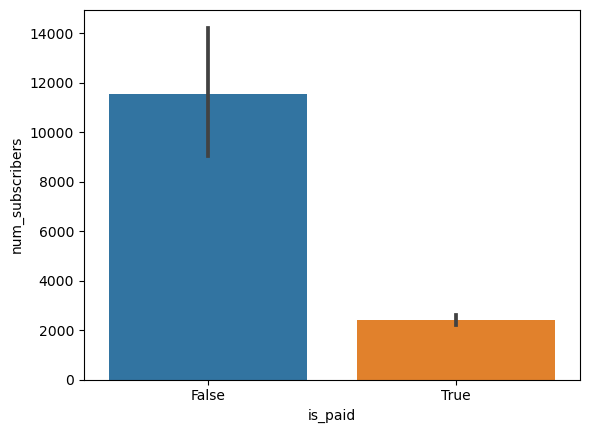

In [146]:
sns.barplot(x="is_paid",y="num_subscribers",data=data)

### Which Level has the Highest No. of the Subscribers

In [147]:
data.groupby("level")["num_subscribers"].max()

level
All Levels            268923
Beginner Level        161029
Expert Level            5172
Intermediate Level     29167
Name: num_subscribers, dtype: int64

### Most popular Course Title

In [148]:
max_subscribers=data["num_subscribers"].max()
course_with_max_subscribers = data[data["num_subscribers"] == max_subscribers]["course_title"]

In [149]:
course_with_max_subscribers

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

### Display the 10 most popular Courses as per No. of the Subscribers

In [150]:
top_10=data.sort_values(by="num_subscribers",ascending=False).head(10)

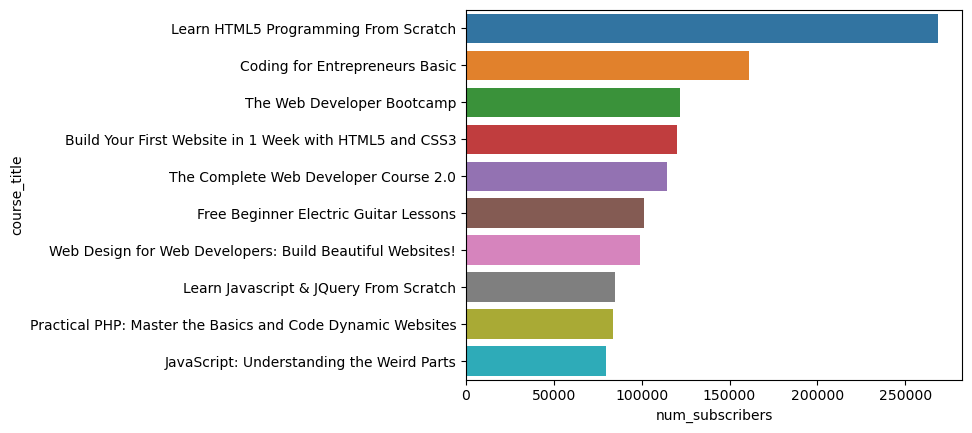

In [151]:
sns.barplot(x="num_subscribers",y="course_title",data=top_10)
plt.show()

### Find Out the Course having the Maximum No. of the Reviews

In [152]:
max_reviews=data["num_reviews"].max()
course_with_max_reviews=data[data["num_reviews"]==max_reviews]["course_title"]

In [153]:
course_with_max_reviews

3230    The Web Developer Bootcamp
Name: course_title, dtype: object

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Business Finance'),
  Text(1, 0, 'Graphic Design'),
  Text(2, 0, 'Musical Instruments'),
  Text(3, 0, 'Web Development')])

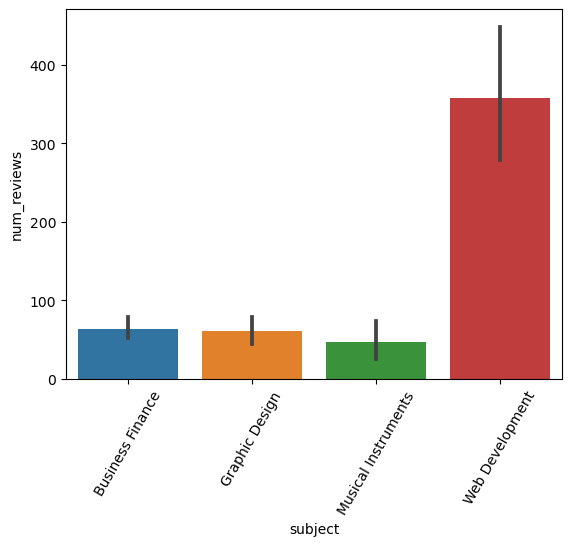

In [154]:
sns.barplot(x="subject",y="num_reviews",data=data)
plt.xticks(rotation=60)

### Find Out the Total No. of the Courses Related to the 'Python'

In [155]:
len(data[data["course_title"].str.contains("python",case=False)])

29

### Display the top 10 Popular Courses Related to the 'Python'

In [156]:
python=data[data["course_title"].str.contains("python",case=False)].sort_values(by="num_subscribers",ascending=False).head(10)


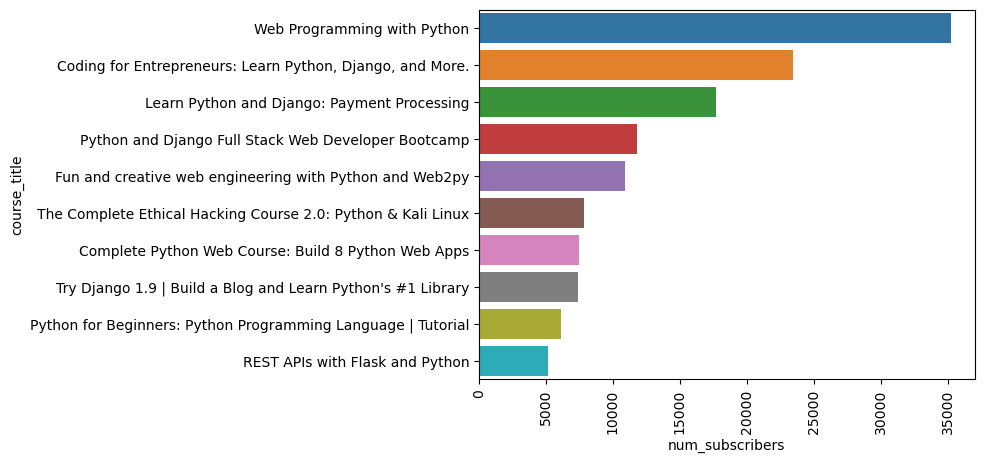

In [157]:
sns.barplot(y="course_title",x="num_subscribers",data=python)
plt.xticks(rotation=90)
plt.show()

### In which Year the highest No. of the Courses were Posted

In [158]:
data["Year"]=data["published_timestamp"].dt.year

In [159]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,2016


<Axes: xlabel='Year', ylabel='count'>

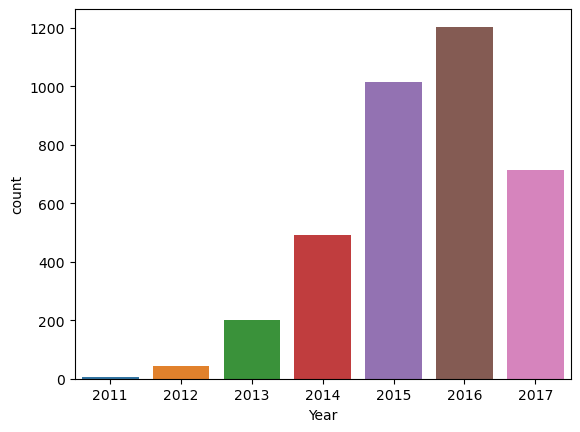

In [160]:
sns.countplot(x="Year",data=data)

### How many Subjects Posted Each & Every Year

In [161]:
data["Year"].value_counts()

Year
2016    1204
2015    1014
2017     713
2014     490
2013     201
2012      45
2011       5
Name: count, dtype: int64

### ---Alhamdulilah---